In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [135]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\Project+2+-+Cars+Dataset.csv")
data= data.dropna()
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [136]:
data["MPG"]=(data["MPG_City"]+data["MPG_Highway"])/2

## 1. Data Understanding



What is the shape of the dataset (rows × columns)?



In [137]:
data.shape

(426, 16)

What are the data types of each column (categorical, numerical, etc.)?



In [138]:
data.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
MPG            float64
dtype: object

Are there missing values? How many per column?



In [139]:
data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
MPG            0
dtype: int64

Are there duplicate rows or columns?



In [140]:
data.duplicated().sum()

np.int64(0)

What is the summary of numerical columns (mean, median, min, max, std)?



In [141]:
data.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188,23.462441
std,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611,5.418899
min,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,11.000000
25%,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000,20.500000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000,23.000000
75%,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000,25.500000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000,63.000000


What is the distribution of categorical variables (e.g., car Make, Type, Origin)?

In [142]:
data.select_dtypes(include="object").columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice'], dtype='object')

In [143]:
data[["MSRP","Invoice"]]

,MSRP,Invoice
0,"$36,945","$33,337"
1,"$23,820","$21,761"
2,"$26,990","$24,647"
3,"$33,195","$30,299"
4,"$43,755","$39,014"
...,...,...
427,"$40,565","$38,203"
428,"$42,565","$40,083"
429,"$45,210","$42,573"
430,"$26,135","$24,641"


In [144]:
for i in data.drop(columns=["Invoice"]).select_dtypes(include="object").columns:
    
    print(f"{i}: {data[i].nunique()}")

Make: 38
Model: 423
Type: 6
Origin: 3
DriveTrain: 3
MSRP: 409


In [145]:
for i in data.select_dtypes(include="object").columns:
    
    print(data[i].value_counts())

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Hyundai          12
Jaguar           12
Pontiac          11
Kia              11
Subaru           11
Lexus            11
Mazda             9
Buick             9
Mercury           9
Lincoln           9
Cadillac          8
GMC               8
Saturn            8
Suzuki            8
Infiniti          8
Acura             7
Saab              7
Porsche           7
Land Rover        3
Oldsmobile        3
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: count, dtype: int64
Model
G35 4dr                           2
C240 4dr                          2
C320 4dr                          2
XC70                              1
MDX                               1
                       

Visualize with bar plots

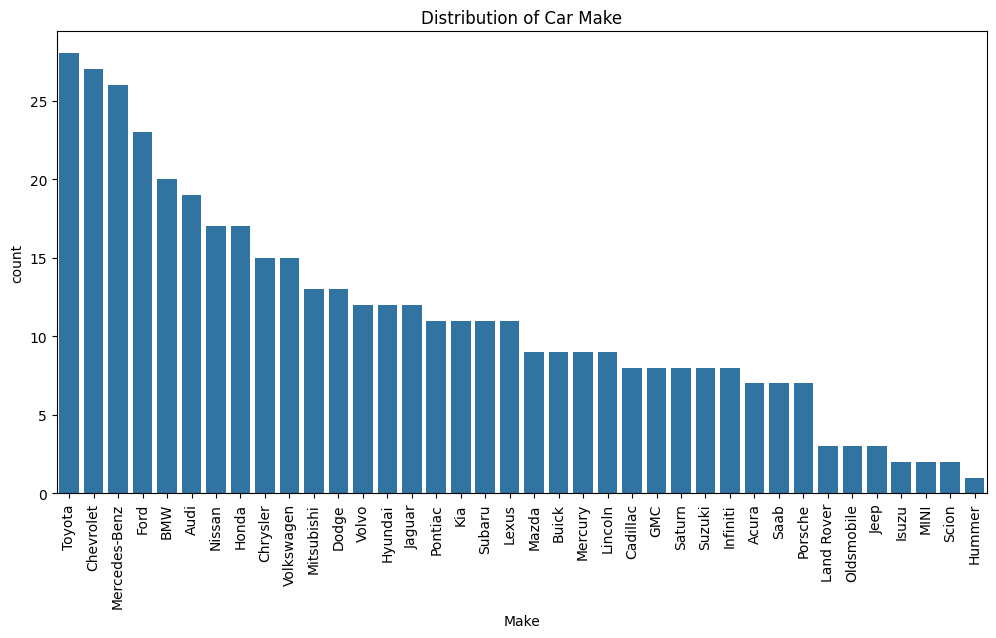

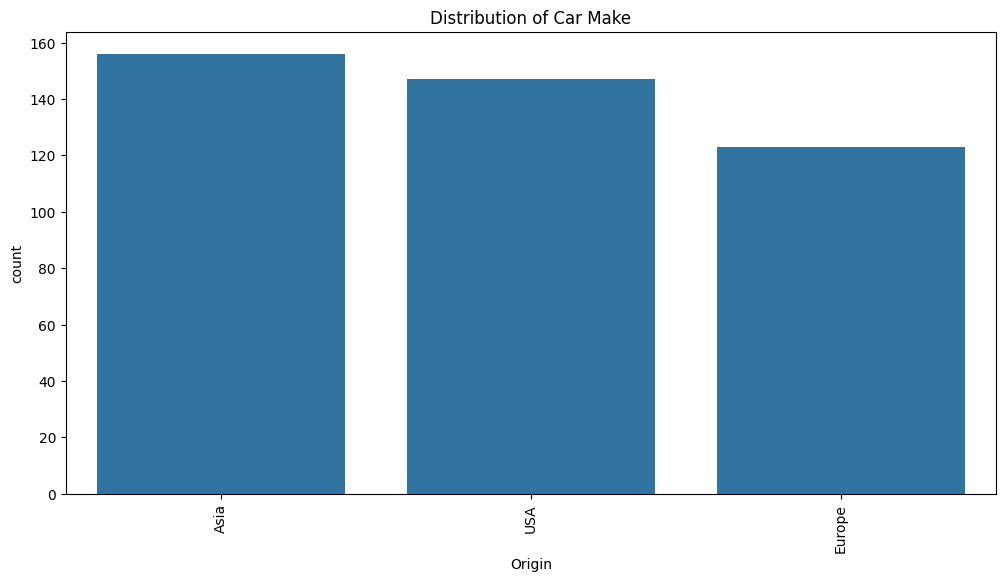

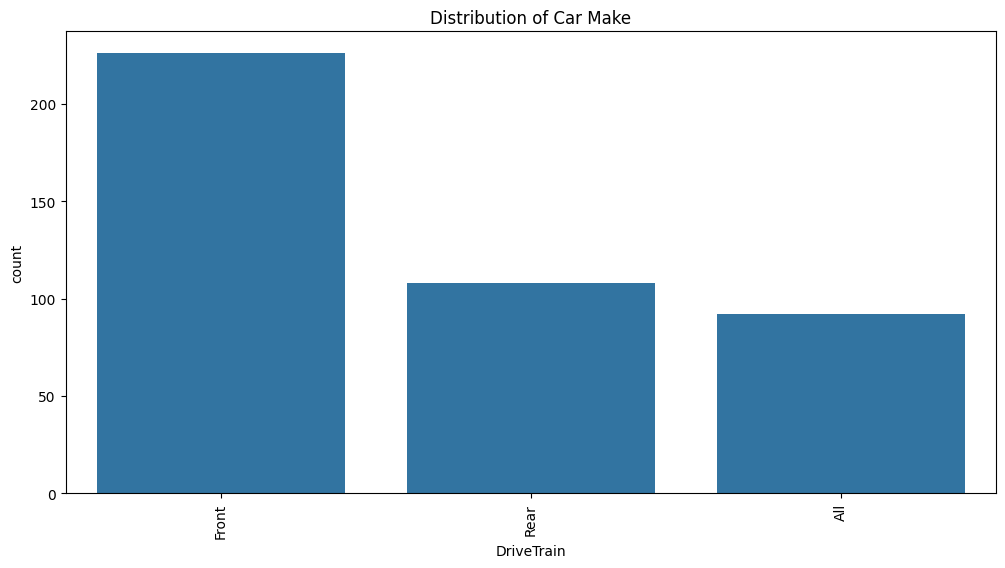

In [146]:
# plt.subplot(nrows, ncols, index)

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Make', order=data['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Origin', order=data['Origin'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='DriveTrain', order=data['DriveTrain'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

2. Univariate Analysis (One variable at a time)

What is the most expensive car (MSRP) and the least expensive?



In [147]:
data["MSRP"]=data["MSRP"].convert_dtypes("float")

In [148]:
print("Most Expensive")
data[["Make","Model","MSRP"]][data["MSRP"]==data["MSRP"].max()]


Most Expensive


,Make,Model,MSRP
265,Mercedes-Benz,CL500 2dr,"$94,820"


In [149]:
print("Least Expensive")
data[["Make","Model","MSRP"]][data["MSRP"]==data["MSRP"].min()]

Least Expensive


,Make,Model,MSRP
210,Kia,Rio 4dr manual,"$10,280"


What is the most common car Type (SUV, Sedan, etc.)?



In [150]:
most_common_car_type=data["Type"].mode()[0]
print(f"Most Common Car Type: {most_common_car_type}")

Most Common Car Type: Sedan


What is the average horsepower, engine size, MPG, etc.?



In [151]:
avg_HP = data["Horsepower"].mean()
avg_engine_size = data["EngineSize"].mean()
avg_MPG_city = data["MPG_City"].mean()
avg_MPG_highway = data["MPG_Highway"].mean()

print(f"Average Horsepower {avg_HP}")
print(f"Average engine size {avg_engine_size}")
print(f"Average MPG city {avg_MPG_city}")
print(f"Average MPG highway {avg_MPG_highway}")

Average Horsepower 215.87793427230048
Average engine size 3.205633802816901
Average MPG city 20.070422535211268
Average MPG highway 26.854460093896712


Which Make (brand) has the most models?



In [152]:
data["Make"].value_counts().idxmax()

'Toyota'

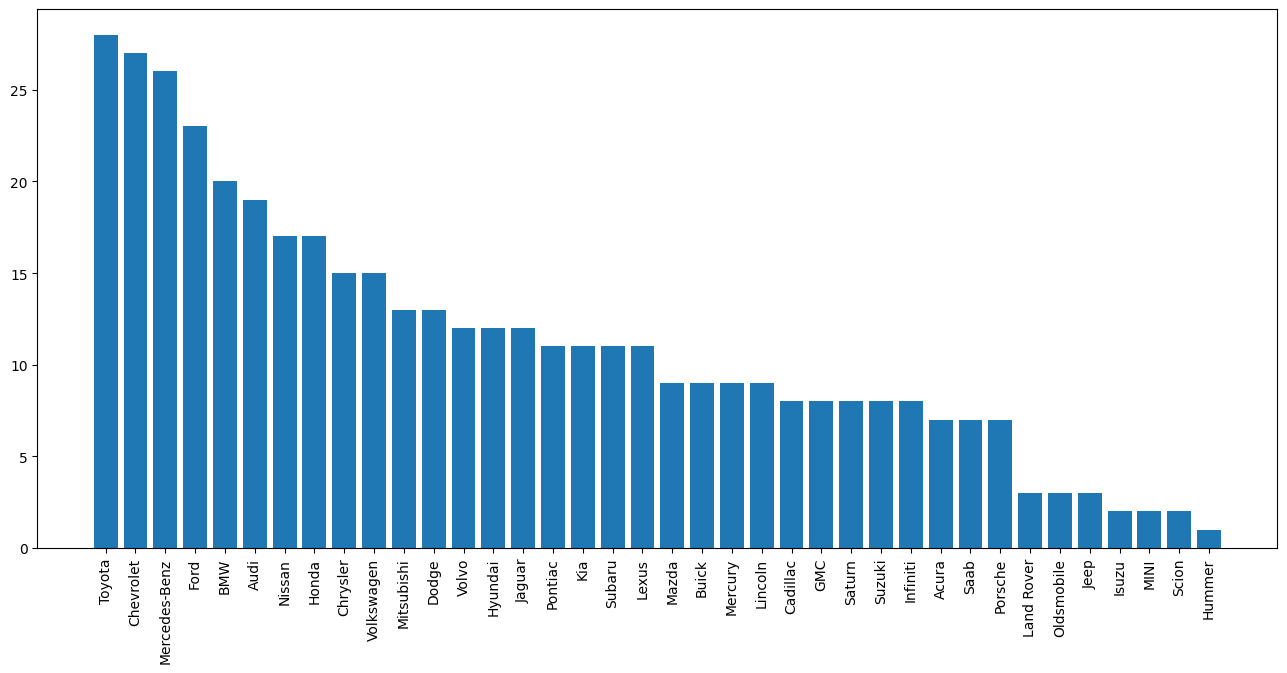

In [153]:
most_models = data["Make"].value_counts()
plt.figure(figsize=(16,7))
plt.bar(most_models.index,most_models.values)
plt.xticks(rotation=90)
plt.show()

Which Origin (USA, Asia, Europe) dominates the dataset?

In [154]:
data["Origin"].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

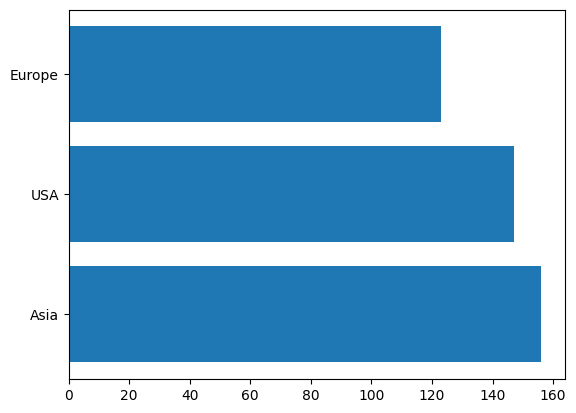

In [155]:
Origin = data["Origin"].value_counts()

plt.barh(Origin.index,Origin.values)
plt.show()

# Multivariate Analysis (More than two variables)

What factors (Engine Size, Horsepower, Cylinders, Weight) best explain car Price (MSRP)?

In [156]:
data["MSRP"] = (data["MSRP"].replace('[\$,]', '', regex=True).str.strip().astype("float64"))


In [157]:
print(data["MSRP"].corr(data["EngineSize"]),
"\n",data["MSRP"].corr(data["Horsepower"]),
"\n",data["MSRP"].corr(data["Cylinders"]),
"\n",data["MSRP"].corr(data["Weight"]))

0.573238186791028 
 0.8272957229087013 
 0.6497419270432131 
 0.4479869103267083


<Axes: >

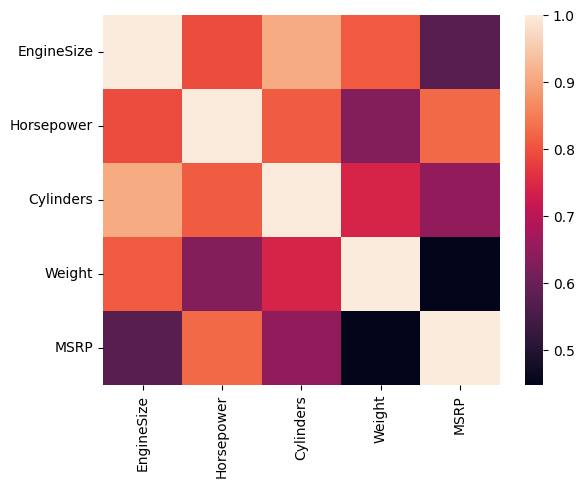

In [158]:
correlation=data[["EngineSize","Horsepower","Cylinders","Weight","MSRP"]].corr()
sns.heatmap(correlation)


<Axes: xlabel='MSRP', ylabel='Weight'>

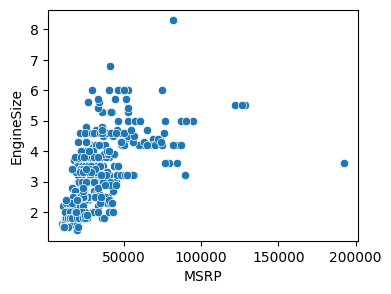

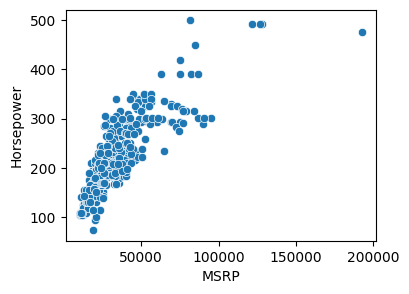

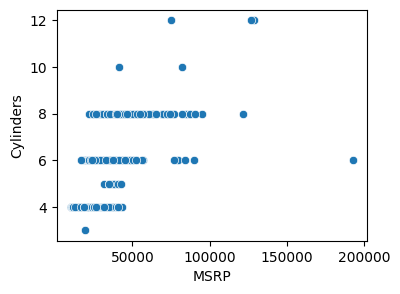

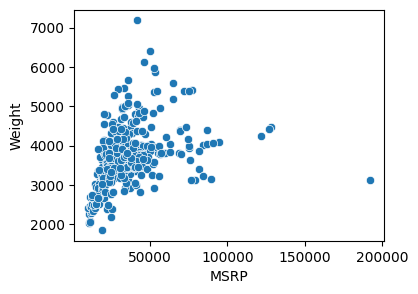

In [159]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="EngineSize")

plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="Horsepower")

plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="Cylinders")

plt.figure(figsize=(4,3))
sns.scatterplot(data=data,x="MSRP",y="Weight")

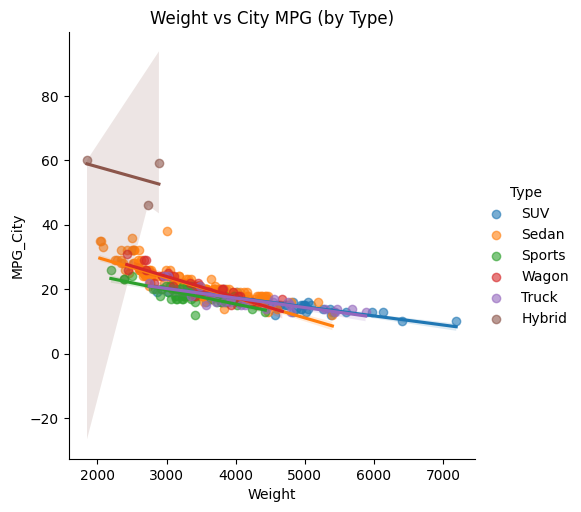

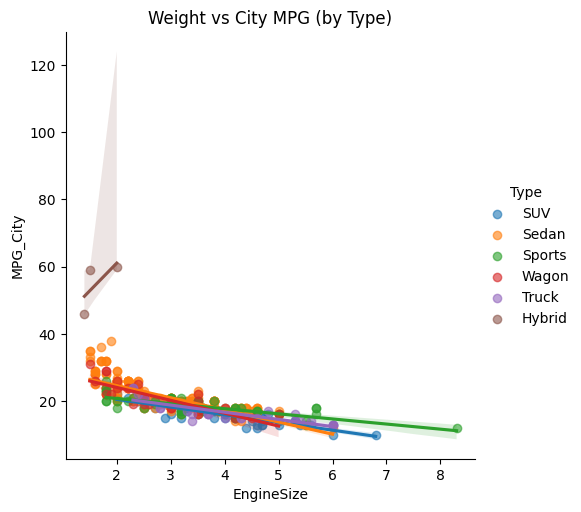

In [160]:
sns.lmplot(data=data, x='Weight', y='MPG_City', hue='Type', scatter_kws={'alpha':0.6})
plt.title("Weight vs City MPG (by Type)")
plt.show()

sns.lmplot(data=data, x='EngineSize', y='MPG_City', hue='Type', scatter_kws={'alpha':0.6})
plt.title("Weight vs City MPG (by Type)")
plt.show()

In [161]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG'],
      dtype='object')

Do heavier cars with bigger engines always have lower MPG?



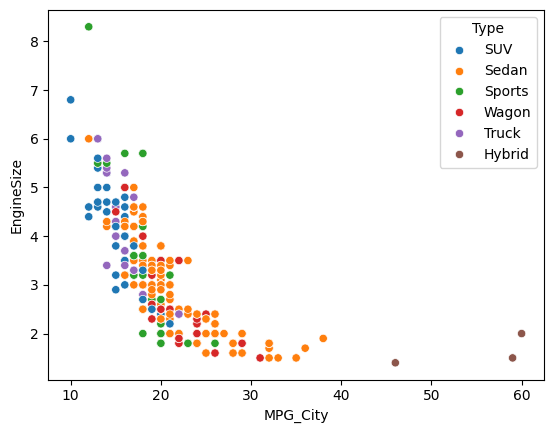

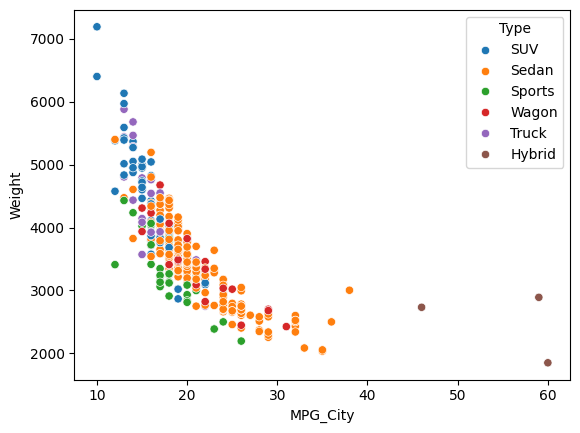

In [162]:
sns.scatterplot(data=data, x="MPG_City",y="EngineSize",hue="Type")
plt.show()

sns.scatterplot(data=data, x="MPG_City",y="Weight",hue="Type")
plt.show()

Are there clear clusters of cars (luxury, economy, sports) if we combine features like horsepower, weight, mpg, and price?

In [163]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG'],
      dtype='object')

In [164]:
from sklearn.cluster import KMeans

In [221]:
x=data[["Horsepower","Weight","MPG","MSRP"]].copy()
x=x.dropna()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [222]:
x.isnull().sum()

Horsepower    0
Weight        0
MPG           0
MSRP          0
dtype: int64

In [223]:
K= KMeans(n_clusters=3,random_state=42)

clusters= K.fit_predict(x_scaled)

In [225]:
clusters

array([2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,

In [226]:
data["Clusters"]=clusters

data["Clusters"].unique()

array([2, 0, 1], dtype=int32)

In [227]:
print(data["MSRP"][data["Clusters"]==0].mean())
print(data["MSRP"][data["Clusters"]==1].mean())
print(data["MSRP"][data["Clusters"]==2].mean())

16588.547368421052
29448.605042016807
57957.6129032258


In [228]:
data["Clusters"]= data["Clusters"].map({0:"Economy Cars",1:"Sports Cars",2:"Luxury Cars"})

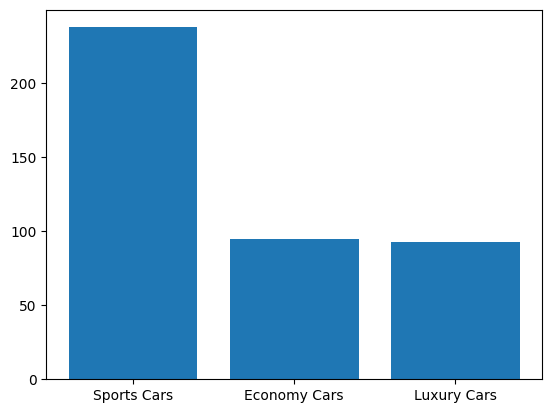

In [229]:
cluster= data["Clusters"].value_counts()

plt.bar(cluster.index,cluster.values)
plt.show()

# 5. Business/Domain-Oriented Questions

What is the profit margin (MSRP – Invoice) for different car brands?



In [230]:
data["Invoice"] = data["Invoice"].replace("[\$,]", "",regex=True).astype("float")

In [231]:
data["ProfitMargin"]= data["MSRP"]-data["Invoice"]


profitmargin= data.groupby("Make")["ProfitMargin"].mean().sort_values(ascending = False)

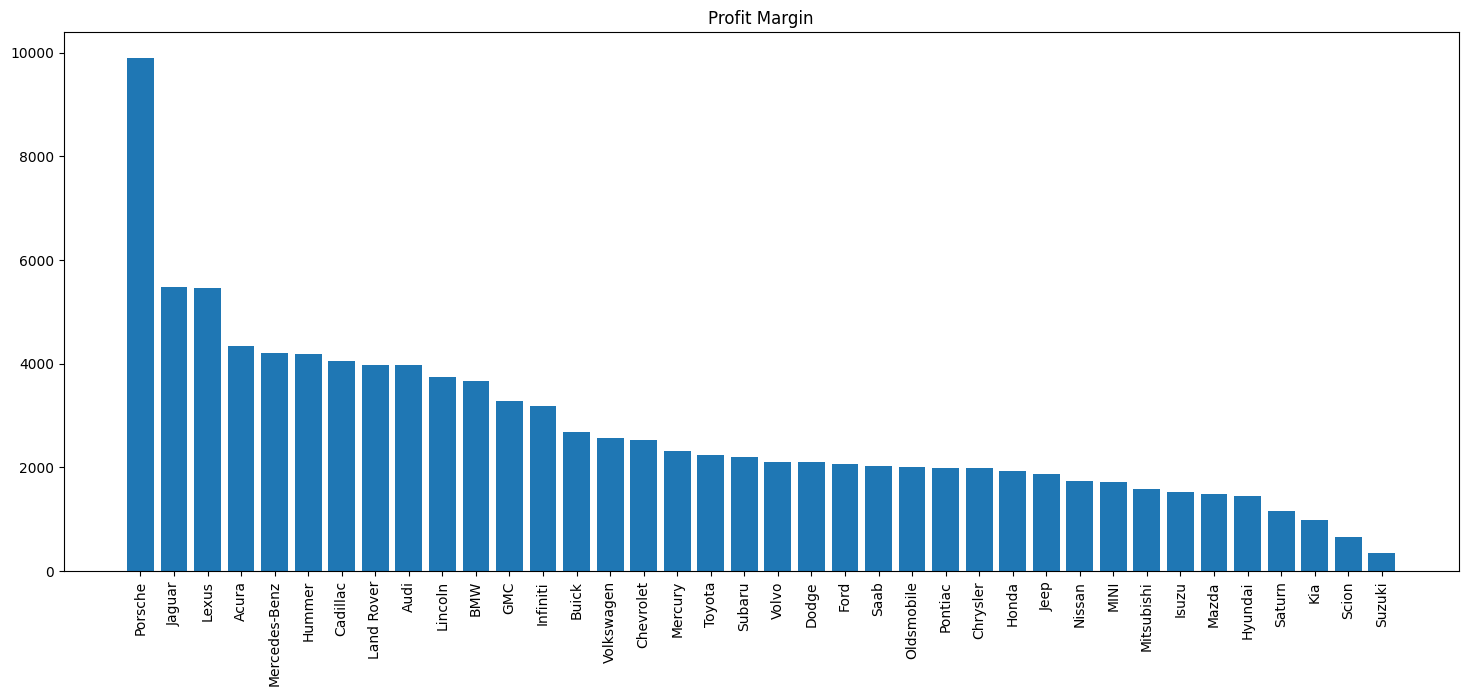

In [232]:
plt.figure(figsize=(18,7))
plt.bar(profitmargin.index, profitmargin.values)
plt.title("Profit Margin")
plt.xticks(rotation =90)
plt.show()

Which car manufacturers price their vehicles the highest relative to engine power?



In [233]:
data_new = data
data_new["Price_per_HP"]= data_new["MSRP"]/data_new["Horsepower"]

In [234]:
Price_per_HP = data_new.groupby("Make")["Price_per_HP"].mean().sort_values(ascending=False)


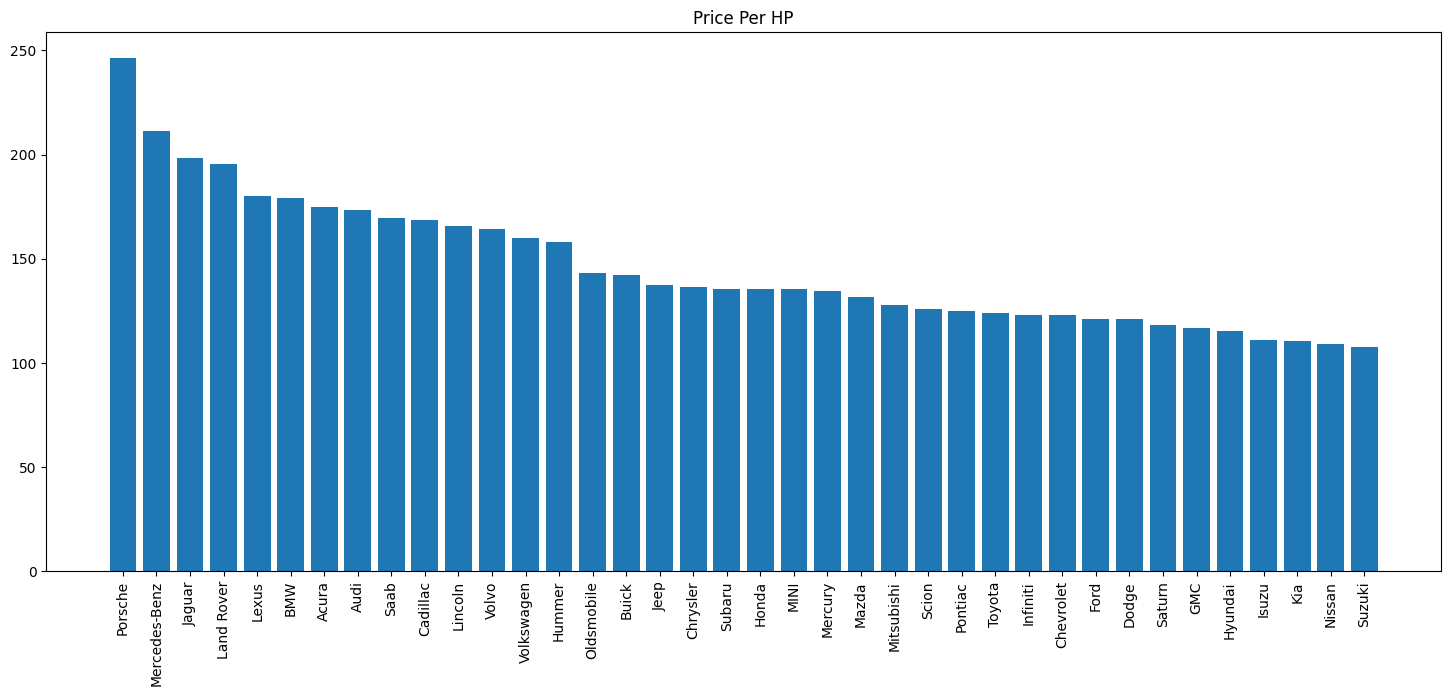

In [235]:
plt.figure(figsize=(18,7))
plt.bar(Price_per_HP.index, Price_per_HP.values)
plt.xticks(rotation=90)
plt.title("Price Per HP")
plt.show()

Which cars offer the best fuel efficiency per price (MPG per dollar)?



In [236]:
data_new["MPG_per_dollar"]=data_new["MSRP"]/data["MPG"]

In [237]:
MPG_per_dollar = data_new.groupby("Make")["MPG_per_dollar"].mean().sort_values(ascending=True)

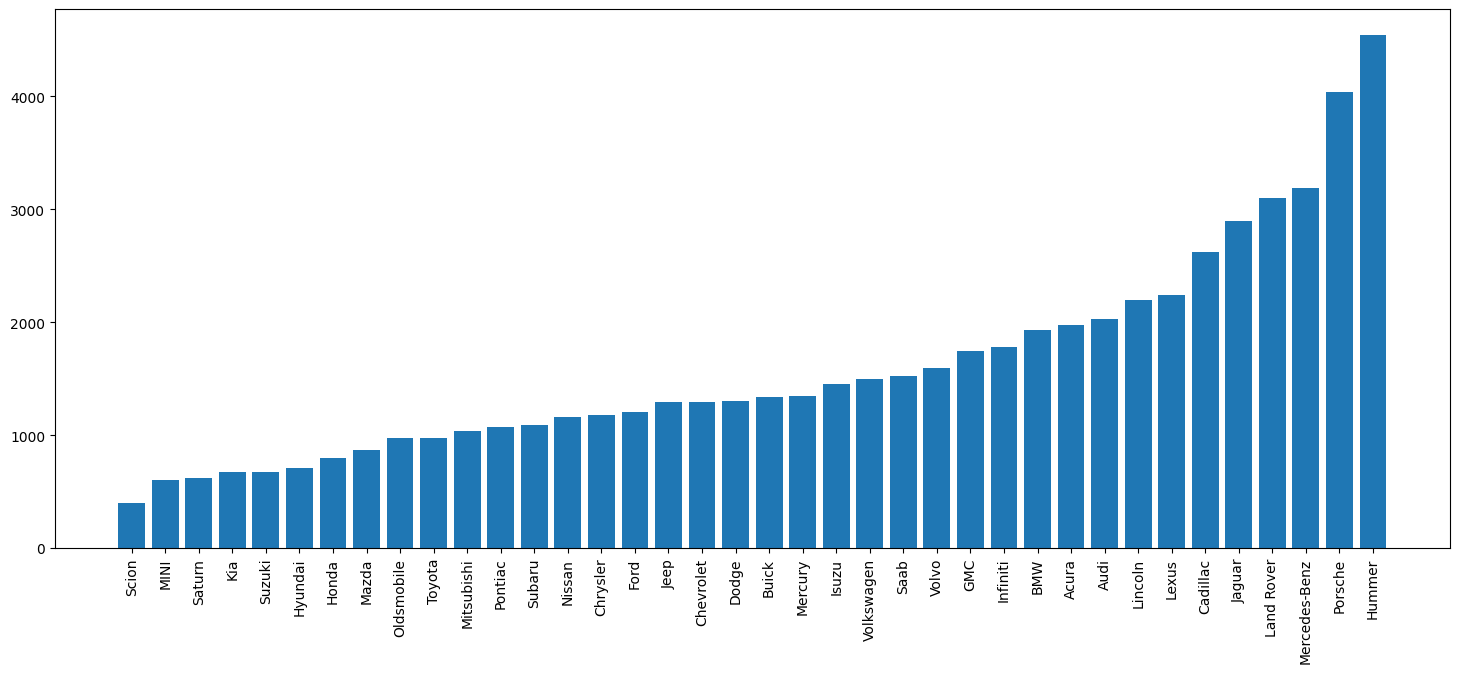

In [238]:
plt.figure(figsize=(18,7))
plt.bar(MPG_per_dollar.index, MPG_per_dollar.values)
plt.xticks(rotation = 90)
plt.show()

Which Type of car offers the best value (low price, high mileage)?



In [239]:
data_new["Value"]= data_new["MPG"]/data_new["MSRP"]

In [240]:
value= data.groupby("Make")["Value"].mean().sort_values(ascending=False)



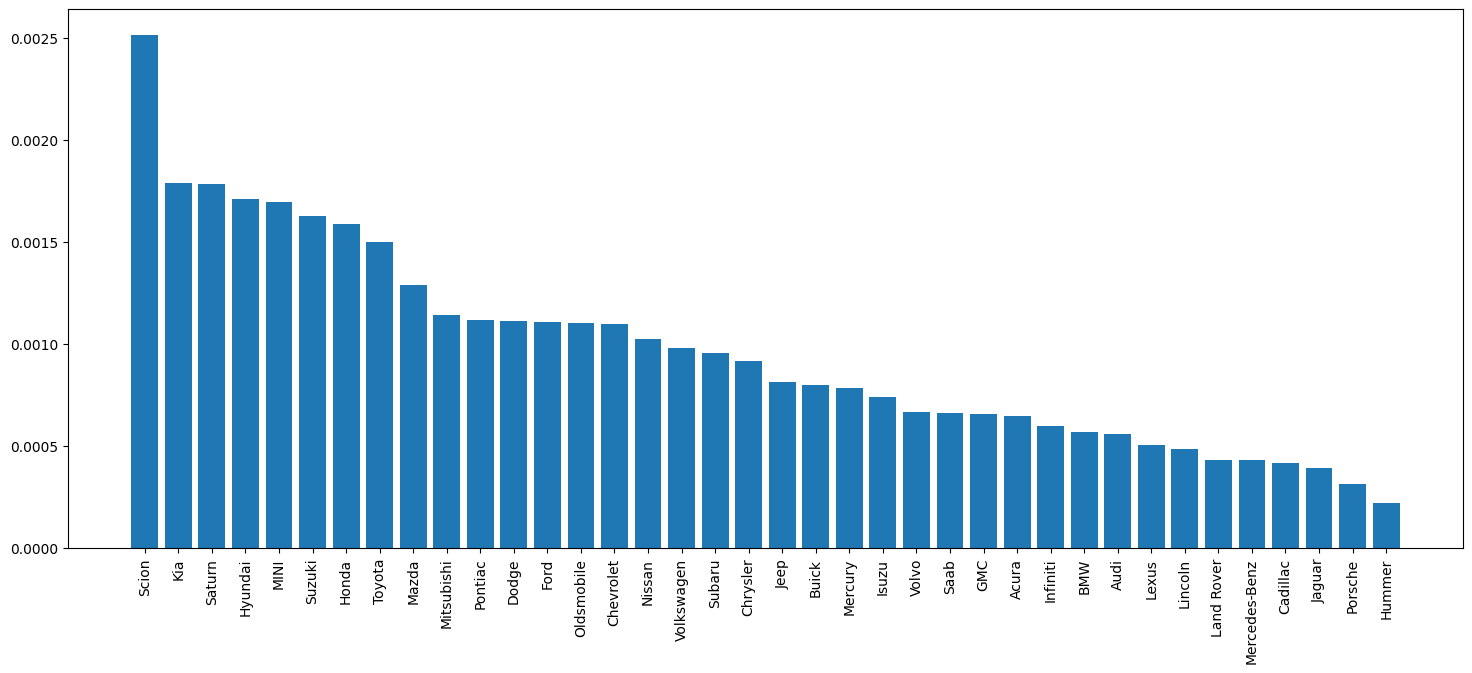

In [241]:
plt.figure(figsize=(18,7))
plt.bar(value.index, value.values)
plt.xticks(rotation = 90)
plt.show()

Are European cars more expensive than American or Asian cars?



In [242]:
Expensive = data_new.groupby("Origin")["MSRP"].mean().sort_values(ascending=False)
Expensive

Origin
Europe    48349.796748
USA       28377.442177
Asia      24719.416667
Name: MSRP, dtype: float64

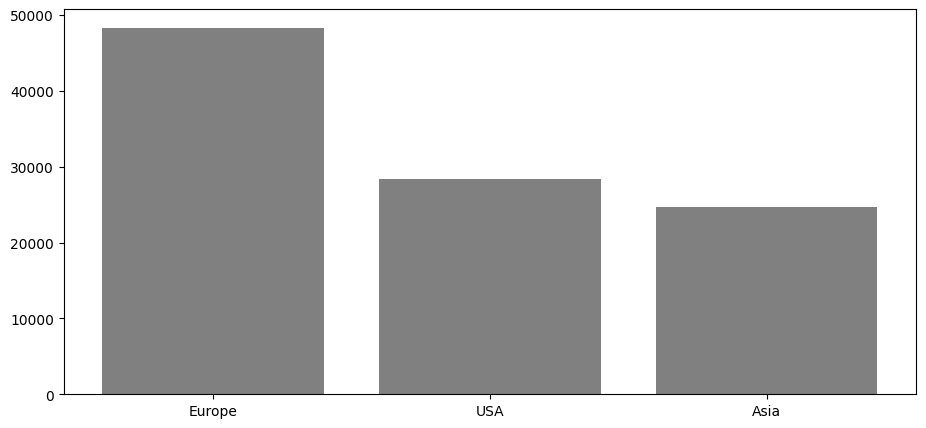

In [243]:
plt.figure(figsize=(11,5))
plt.bar(Expensive.index, Expensive.values,color = "grey")

plt.show()

Which car brands focus more on performance (high horsepower) vs. efficiency (high MPG)?



# 6. Advanced/ML-Oriented Questions

Can we predict car price (MSRP) from the other features?



In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 431
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            426 non-null    object 
 1   Model           426 non-null    object 
 2   Type            426 non-null    object 
 3   Origin          426 non-null    object 
 4   DriveTrain      426 non-null    object 
 5   MSRP            426 non-null    float64
 6   Invoice         426 non-null    float64
 7   EngineSize      426 non-null    float64
 8   Cylinders       426 non-null    float64
 9   Horsepower      426 non-null    float64
 10  MPG_City        426 non-null    float64
 11  MPG_Highway     426 non-null    float64
 12  Weight          426 non-null    float64
 13  Wheelbase       426 non-null    float64
 14  Length          426 non-null    float64
 15  MPG             426 non-null    float64
 16  Clusters        426 non-null    object 
 17  ProfitMargin    426 non-null    float64


In [245]:
y= data["MSRP"]
x= data.drop(columns=["Clusters","MPG_City","MPG_Highway","MSRP","Invoice"])

In [246]:
categorical_columns = ['Make', 'Model']
categorical_columns

['Make', 'Model']

In [247]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [248]:
for i in categorical_columns:
    x[i]=encoder.fit_transform(x[i])

In [249]:
columns_scale = x.drop(columns=['Type', 'Origin', 'DriveTrain']).columns

x[columns_scale] = scaler.fit_transform(x[columns_scale])

In [250]:
x= pd.get_dummies(x,['Type', 'Origin', 'DriveTrain'],drop_first=True)

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [252]:
x

,Make,Model,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length,MPG,ProfitMargin,...,Value,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Europe,Origin_USA,DriveTrain_Front,DriveTrain_Rear
0,-1.500398,0.153424,0.267066,0.123658,0.683138,1.146972,-0.260127,0.179781,-0.639708,0.432792,...,-0.668026,True,False,False,False,False,False,False,False,False
1,-1.500398,0.677868,-1.093819,-1.161183,-0.220814,-1.057309,-0.861070,-1.004909,0.745964,-0.361415,...,0.288154,False,True,False,False,False,False,False,True,False
2,-1.500398,1.259672,-0.730917,-1.161183,-0.220814,-0.461771,-0.380316,-0.238345,0.376452,-0.215802,...,-0.038862,False,True,False,False,False,False,False,True,False
3,-1.500398,1.251478,-0.005111,0.123658,0.752673,-0.007213,-0.019749,-0.029282,0.099317,0.067733,...,-0.384742,False,True,False,False,False,False,False,True,False
4,-1.500398,-1.723100,0.267066,0.123658,0.126860,0.394644,0.821572,0.737283,-0.454952,1.013706,...,-0.763778,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1.636526,-1.042962,-0.730917,-0.518762,-0.262534,-0.171908,-0.380316,-0.029282,0.191696,-0.206060,...,-0.570367,False,True,False,False,False,True,False,True,False
428,1.636526,-1.051157,-0.821642,-0.518762,0.363278,-0.171908,-0.380316,-0.029282,-0.085439,-0.144533,...,-0.669578,False,True,False,False,False,True,False,True,False
429,1.636526,0.899117,-0.277288,0.123658,0.724859,0.095557,0.220628,0.249469,-0.177817,-0.065062,...,-0.736125,False,True,False,False,False,True,False,True,False
430,1.636526,1.448144,-1.184545,-1.161183,-0.638022,-0.999337,-0.861070,-0.447408,0.376452,-0.651103,...,0.009339,False,False,False,False,True,True,False,True,False


In [253]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((298, 22), (128, 22), (298,), (128,))

In [254]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()

In [255]:
LR.fit(x_train,y_train)

LinearRegression()

In [256]:
LR.score(x_test,y_test)

0.9893024928748385

In [257]:
y_predicted=LR.predict(x_test)

In [258]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_absolute_error

In [259]:
print(mean_absolute_error(y_predicted,y_test))
print(root_mean_squared_error(y_predicted,y_test))
print(mean_absolute_error(y_predicted,y_test))

1220.1977237794508
1701.3401693589608
1220.1977237794508


In [260]:
y_predicted[:5],y_test[:5]

(array([39081.16197022, 20922.7133473 , 24033.49601983, 39634.70148728,
        31209.15856848]),
 424    37560.0
 77     21825.0
 180    24589.0
 31     37995.0
 363    31545.0
 Name: MSRP, dtype: float64)

Can we classify cars into their correct Type based on specifications?



In [261]:
data

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,...,MPG_Highway,Weight,Wheelbase,Length,MPG,Clusters,ProfitMargin,Price_per_HP,MPG_per_dollar,Value
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,...,23.0,4451.0,106.0,189.0,20.0,Luxury Cars,3608.0,139.415094,1847.250000,0.000541
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,...,31.0,2778.0,101.0,172.0,27.5,Economy Cars,2059.0,119.100000,866.181818,0.001154
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,...,29.0,3230.0,105.0,183.0,25.5,Sports Cars,2343.0,134.950000,1058.431373,0.000945
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,...,28.0,3575.0,108.0,186.0,24.0,Sports Cars,2896.0,122.944444,1383.125000,0.000723
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,...,24.0,3880.0,115.0,197.0,21.0,Sports Cars,4741.0,194.466667,2083.571429,0.000480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,...,28.0,3450.0,105.0,186.0,24.5,Sports Cars,2362.0,205.913706,1655.714286,0.000604
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,...,26.0,3450.0,105.0,186.0,23.0,Sports Cars,2482.0,175.888430,1850.652174,0.000540
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,...,26.0,3653.0,110.0,190.0,22.5,Sports Cars,2637.0,168.694030,2009.333333,0.000498
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,...,29.0,2822.0,101.0,180.0,25.5,Economy Cars,1494.0,153.735294,1024.901961,0.000976


In [262]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG', 'Clusters', 'ProfitMargin',
       'Price_per_HP', 'MPG_per_dollar', 'Value'],
      dtype='object')

In [263]:
y= data["Type"]
x1=data[['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length']]


In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


x_scaled1 = pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x_scaled1

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0.304348,0.333333,0.449649,0.14,0.203704,0.487079,0.309091,0.484211
1,0.086957,0.111111,0.297424,0.28,0.351852,0.173783,0.218182,0.305263
2,0.144928,0.111111,0.297424,0.24,0.314815,0.258427,0.290909,0.421053
3,0.260870,0.333333,0.461358,0.20,0.296296,0.323034,0.345455,0.452632
4,0.304348,0.333333,0.355972,0.16,0.222222,0.380150,0.472727,0.568421
...,...,...,...,...,...,...,...,...
421,0.144928,0.222222,0.290398,0.22,0.296296,0.299625,0.290909,0.452632
422,0.130435,0.222222,0.395785,0.20,0.259259,0.299625,0.290909,0.452632
423,0.217391,0.333333,0.456674,0.18,0.259259,0.337640,0.381818,0.494737
424,0.072464,0.111111,0.227166,0.24,0.314815,0.182022,0.218182,0.389474


In [265]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled1,y, train_size=0.85,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((362, 8), (64, 8), (362,), (64,))

In [266]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()

LG.fit(x_train,y_train)

LogisticRegression()

In [267]:
LG.score(x_test,y_test)

0.734375

In [268]:
y_predicted=LG.predict(x_test)

In [269]:

print(y_predicted[:5],end=" ")
print(y_test[:5],end=" ")    


['Sedan' 'Sedan' 'Sedan' 'Sedan' 'Sedan'] 424    Sedan
77     Sedan
180    Sedan
31     Sedan
363    Sedan
Name: Type, dtype: object 

In [270]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_predicted,y_test,average="macro")

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.4117886178861788, 0.4928571428571429, 0.4149484536082474, None)

In [271]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG', 'Clusters', 'ProfitMargin',
       'Price_per_HP', 'MPG_per_dollar', 'Value'],
      dtype='object')

Can we cluster cars into similar groups without using the Type column?



In [275]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length', 'MPG', 'Clusters', 'ProfitMargin',
       'Price_per_HP', 'MPG_per_dollar', 'Value'],
      dtype='object')

In [286]:
x2 = data[['Make', 'Model', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length']]

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()


for i in x2.select_dtypes("object").columns:
       x2[i]= encoder.fit_transform(x2[i])

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_1020\317157341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[i]= encoder.fit_transform(x2[i])
C:\Users\PAWAN\AppData\Local\Temp\ipykernel_1020\317157341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[i]= encoder.fit_transform(x2[i])
C:\Users\PAWAN\AppData\Local\Temp\ipykernel_1020\317157341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [287]:
x2.drop(columns=["Make","Model"],inplace=True)


C:\Users\PAWAN\AppData\Local\Temp\ipykernel_1020\4161363749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.drop(columns=["Make","Model"],inplace=True)


In [290]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

x2 = pd.DataFrame(scaler.fit_transform(x2),columns=x2.columns)
x2

,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,-1.0,-1.0,-0.707276,-0.713327,-0.391304,-0.333333,-0.100703,-0.72,-0.592593,-0.025843,-0.381818,-0.031579
1,-1.0,0.0,-0.851360,-0.854770,-0.826087,-0.777778,-0.405152,-0.44,-0.296296,-0.652434,-0.563636,-0.389474
2,-1.0,0.0,-0.816560,-0.819507,-0.710145,-0.777778,-0.405152,-0.52,-0.370370,-0.483146,-0.418182,-0.157895
3,-1.0,0.0,-0.748443,-0.750448,-0.478261,-0.333333,-0.077283,-0.60,-0.407407,-0.353933,-0.309091,-0.094737
4,-1.0,0.0,-0.632516,-0.643962,-0.391304,-0.333333,-0.288056,-0.68,-0.555556,-0.239700,-0.054545,0.136842
...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.0,0.0,-0.667536,-0.653872,-0.710145,-0.555556,-0.419204,-0.56,-0.407407,-0.400749,-0.418182,-0.094737
422,0.0,0.0,-0.645580,-0.630901,-0.739130,-0.555556,-0.208431,-0.60,-0.481481,-0.400749,-0.418182,-0.094737
423,0.0,0.0,-0.616544,-0.600477,-0.565217,-0.333333,-0.086651,-0.64,-0.481481,-0.324719,-0.236364,-0.010526
424,0.0,0.0,-0.825946,-0.819580,-0.855072,-0.777778,-0.545667,-0.52,-0.370370,-0.635955,-0.563636,-0.221053


In [291]:
from sklearn.cluster import KMeans

K = KMeans(n_clusters=6)

x2["Predicted"] = K.fit_predict(x2)

In [294]:
x2["Predicted"]

0      4
1      2
2      2
3      3
4      3
      ..
421    3
422    3
423    3
424    2
425    4
Name: Predicted, Length: 426, dtype: int32

What are the most important features influencing car prices?



🔹 7. Visualization-Oriented Questions

What does the distribution of MSRP look like (histogram)?

What is the correlation heatmap of all numerical features?

Boxplot of MSRP by Type (to compare car types).

Scatterplot of Horsepower vs MSRP (with color = Type).

Bar chart of average MPG_City by Origin.

Trend: How does Weight affect Highway MPG?